In [20]:
import csv
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from tqdm import tqdm

# your modules are imported here
from vector_ranker import VectorRanker
from relevance import map_score, ndcg_score

In [4]:
# change these to point to actual file paths
DRIVE_PATH = '../data/'
CACHE_PATH = '../cache/'
STOPWORD_PATH = DRIVE_PATH + 'stopwords.txt'
DATASET_PATH = DRIVE_PATH + 'wikipedia_200k_dataset.jsonl.gz'
EDGELIST_PATH = DRIVE_PATH + 'edgelist.csv'
NETWORK_STATS_PATH = DRIVE_PATH + 'network_stats.csv'
DOC2QUERY_PATH = DRIVE_PATH + 'doc2query.csv'
MAIN_INDEX = 'main_index_augmented'
TITLE_INDEX = 'title_index'
RELEVANCE_TRAIN_DATA = DRIVE_PATH + 'hw3_relevance.train.csv'
ENCODED_DOCUMENT_EMBEDDINGS_NPY_DATA = DRIVE_PATH + \
    'wiki-200k-vecs.msmarco-MiniLM-L12-cos-v5.npy'

In [5]:
with open('../cache/sentence-transformers_msmarco-MiniLM-L12-cos-v5.npy', 'rb') as file:
    encoded_docs = np.load(file)
encoded_map = pickle.load(
    open('../cache/sentence-transformers_msmarco-MiniLM-L12-cos-v5.pkl', 'rb'))

In [6]:
with open('../data/hw3_relevance.dev.csv', 'r') as file:
    data = csv.reader(file)
    dev_queries = []
    for idx, row in tqdm(enumerate(data)):
        if idx == 0:
            continue
        if row[0] not in dev_queries:
            dev_queries.append(row[0])

2532it [00:00, 934939.50it/s]


In [7]:
vector_ranker = VectorRanker('sentence-transformers/msmarco-MiniLM-L12-cos-v5',
                                    encoded_docs,
                                    row_to_docid=encoded_map)

In [8]:
def score_vector_ranker(vector_ranker, queries):
    scores = []
    for query in queries:
        print(query)
        score = vector_ranker.query(query)
        scores.append(score)
        print(score)
    return scores

In [9]:
scores_MiniLM = score_vector_ranker(vector_ranker, dev_queries)

What is the history and cultural importance of traditional Chinese martial arts
[(19501, 0.6590808033943176), (839744, 0.5827271342277527), (5760, 0.5544252395629883), (21478413, 0.551679790019989), (21143784, 0.5486842393875122), (21556371, 0.5334599018096924), (28050241, 0.5253394842147827), (557407, 0.5249284505844116), (1491156, 0.502776026725769), (227244, 0.46944525837898254), (16746, 0.46647757291793823), (15601, 0.46114903688430786), (367843, 0.45722687244415283), (5405, 0.45357847213745117), (1673810, 0.4532241225242615), (39604910, 0.4464746415615082), (153825, 0.4383085370063782), (324109, 0.43754875659942627), (590756, 0.43582189083099365), (5517266, 0.4302526116371155), (27577764, 0.42881345748901367), (277914, 0.42261406779289246), (5822, 0.4217648506164551), (145957, 0.4204576015472412), (6583, 0.4204063415527344), (14189344, 0.41692277789115906), (80356, 0.41300639510154724), (41138872, 0.41066282987594604), (14194836, 0.4088679552078247), (28288, 0.40439361333847046), 

In [10]:
with open('../cache/multi-qa-mpnet-base-dot-v1.npy', 'rb') as file:
    encoded_docs = np.load(file)

vector_ranker = VectorRanker('multi-qa-mpnet-base-dot-v1', 
                                   encoded_docs, encoded_map)

In [11]:
scores_multi = score_vector_ranker(vector_ranker, dev_queries)

What is the history and cultural importance of traditional Chinese martial arts
[(839744, 0.5993214249610901), (19501, 0.5936483144760132), (145957, 0.5726782083511353), (21143784, 0.5610215663909912), (28050241, 0.5256883502006531), (5992, 0.5225520133972168), (5760, 0.5212910771369934), (5822, 0.5175789594650269), (590756, 0.5129899978637695), (1624762, 0.5084823966026306), (557407, 0.50706946849823), (1491156, 0.501541018486023), (153825, 0.49781930446624756), (6583, 0.49569764733314514), (30365, 0.49266472458839417), (41334796, 0.4901926517486572), (21556371, 0.48875805735588074), (39512776, 0.48583418130874634), (39604910, 0.47311556339263916), (21227309, 0.4729720950126648), (1586702, 0.46521082520484924), (5820, 0.4588969945907593), (618649, 0.4586191773414612), (80356, 0.4569166600704193), (153223, 0.4549785554409027), (29098, 0.4526529312133789), (37773622, 0.4449760615825653), (46636, 0.44188690185546875), (3398337, 0.438738077878952), (4705067, 0.43671098351478577), (1395401

In [12]:
with open('../cache/msmarco-distilbert-dot-v5.npy', 'rb') as file:
    encoded_docs = np.load(file)

vector_ranker = VectorRanker('msmarco-distilbert-dot-v5',
                                     encoded_docs, encoded_map)

In [13]:
scores_msmarco = score_vector_ranker(vector_ranker, dev_queries)

What is the history and cultural importance of traditional Chinese martial arts
[(19501, 0.846596896648407), (21143784, 0.8229814767837524), (145957, 0.8176786303520203), (1491156, 0.816571831703186), (5992, 0.8149479627609253), (28050241, 0.8146230578422546), (5760, 0.8145830631256104), (29560452, 0.8142606616020203), (39604910, 0.8134936094284058), (30365, 0.8130937218666077), (1586702, 0.8100324869155884), (227244, 0.8095848560333252), (590756, 0.8052281737327576), (5820, 0.8048477172851562), (30153241, 0.8041157722473145), (5405, 0.80320143699646), (839744, 0.8030563592910767), (557407, 0.8030523657798767), (16746, 0.8028775453567505), (9890861, 0.8013888001441956), (29098, 0.799298107624054), (13666465, 0.7992829084396362), (618649, 0.7985520362854004), (5822, 0.7978031039237976), (3398337, 0.7976751923561096), (39512776, 0.7958091497421265), (25310, 0.7955569624900818), (33734529, 0.795342206954956), (47106911, 0.7952972054481506), (1738605, 0.7951871156692505), (705408, 0.794899

In [14]:
rel_df = pd.read_csv('../data/hw3_relevance.dev.csv')

In [15]:
def get_scores(scores):
    MAP_list = []
    NDCG_list = []

    for i, query in enumerate(dev_queries):
        ideal = rel_df[rel_df['query'] == query].sort_values(
            by='rel', ascending=False)
        response = scores[i]
        relevances_map = []
        relevances_ndcg = []
        for j in range(len(response)):
            docid = response[j][0]
            true_ids = ideal['docid'].values
            if docid in true_ids:
                rel = ideal[ideal['docid'] == docid]['rel'].values[0]
                relevances_map.append(1 if rel > 4 else 0)
                relevances_ndcg.append(rel)
            else:
                relevances_map.append(0)
                relevances_ndcg.append(0)
        map = map_score(relevances_map)
        ndcg = ndcg_score(relevances_ndcg, ideal['rel'].values)
        MAP_list.append(map)
        NDCG_list.append(ndcg)

    map = np.mean(MAP_list)
    ndcg = np.mean(NDCG_list)
    print("MAP: ", MAP_list)
    print("NDCG: ", NDCG_list)
    print("MAP: ", map)
    print("NDCG: ", ndcg)
    return MAP_list, NDCG_list

In [16]:
map_MiniLM, ndcg_MiniLM = get_scores(scores_MiniLM)

MAP:  [0.10952380952380951, 0, 0.1, 0.23333333333333334, 0.016666666666666666, 0, 0, 0.014285714285714285, 0.1, 0.05333333333333333, 0, 0.0125, 0, 0, 0.38416666666666666, 0.19666666666666666, 0, 0.025, 0]
NDCG:  [0.6021530001501163, 0.14481434149060393, 0.3053280468314651, 0.7463071184871392, 0.13919398946080905, 0.06102625569693343, 0.42596365342629533, 0.3072286071074857, 0.20704870138535778, 0.4052280379753489, 0.13266336140441234, 0.06343775459021642, 0.3806265275412985, 0.11454485298430737, 0.6901495611821857, 0.6679474155651738, 0.49134203548282784, 0.5348016153300036, 0.1745737109289205]
MAP:  0.06555137844611529
NDCG:  0.34707255721162633


In [17]:
map_multi, ndcg_multi = get_scores(scores_multi)

MAP:  [0.07857142857142857, 0, 0.1, 0.15, 0.0365079365079365, 0, 0, 0.1, 0.1, 0.11607142857142856, 0, 0.03333333333333333, 0, 0, 0.5583333333333333, 0.11333333333333333, 0.02, 0.1, 0]
NDCG:  [0.5731046511890165, 0.22703145698827212, 0.6627466220743146, 0.5909409850946792, 0.1278281026631878, 0.2237629375554226, 0.4154944055868248, 0.30808520672200906, 0.20704870138535778, 0.6281930955147021, 0.1303150118660182, 0.1856450697293611, 0.7428647244539446, 0.06821903808416928, 0.8477872738897602, 0.6585539837578416, 0.5558803423585585, 0.7347806851846259, 0.26541751742620817]
MAP:  0.07927109440267337
NDCG:  0.4291420953433829


In [18]:
map_msmarco, ndcg_msmarco = get_scores(scores_msmarco)

MAP:  [0.04523809523809523, 0.025, 0.1, 0.2, 0.11083333333333334, 0, 0, 0.1, 0.1, 0.14999999999999997, 0, 0, 0, 0, 0.2928571428571428, 0.03333333333333333, 0.025, 0.1, 0]
NDCG:  [0.5788574079549473, 0.27438329620384294, 0.6303905913483022, 0.6822561208985177, 0.265475516598869, 0.1105331311954297, 0.4382329026045347, 0.24600137257197774, 0.27112659847751136, 0.5309235219888259, 0.10084532098172026, 0.0655707691171656, 0.13122870694730643, 0.09198157962742357, 0.7073100148084488, 0.5643145993653647, 0.564475617457901, 0.5656839449426444, 0.2890534242491042]
MAP:  0.0674874686716792
NDCG:  0.374139180912623


In [32]:
df_data = []
for data in map_MiniLM:
    df_data.append((data, 'MiniLM', 'MAP'))
for data in ndcg_MiniLM:
    df_data.append((data, 'MiniLM', 'NDCG'))
for data in map_multi:
    df_data.append((data, 'multi', 'MAP'))
for data in ndcg_multi:
    df_data.append((data, 'multi', 'NDCG'))
for data in map_msmarco:
    df_data.append((data, 'msmarco', 'MAP'))
for data in ndcg_msmarco:
    df_data.append((data, 'msmarco', 'NDCG'))

In [33]:
df = pd.DataFrame(df_data, columns=['score', 'model', 'metric'])
df

,score,model,metric
0,0.109524,MiniLM,MAP
1,0.000000,MiniLM,MAP
2,0.100000,MiniLM,MAP
3,0.233333,MiniLM,MAP
4,0.016667,MiniLM,MAP
...,...,...,...
109,0.707310,msmarco,NDCG
110,0.564315,msmarco,NDCG
111,0.564476,msmarco,NDCG
112,0.565684,msmarco,NDCG


Text(0.5, 1.0, 'MAP@10 and NDCG@10 across Queries')

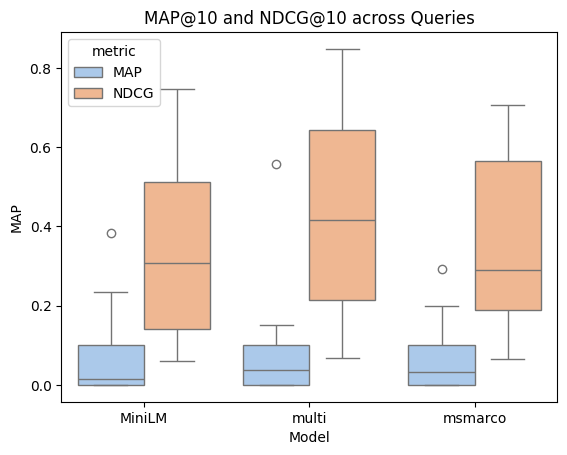

In [35]:
plot = sns.boxplot(data=df, x="model", y="score", hue="metric", palette="pastel")
plot.set_xlabel('Model')
plot.set_ylabel('MAP')
plot.set_title('MAP@10 and NDCG@10 across Queries')